<a href="https://colab.research.google.com/github/Javorai/Coding-Dojo-Core/blob/main/Aprendizaje_profundo_MLP_con_Early_Stopping_y_Dropout_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MLP con Early Stopping y Dropout (Core)**
**Descripción:**

En esta actividad, implementarás una red MLP más avanzada, utilizando técnicas como dropout y early stopping para evitar el sobreajuste. El dataset seleccionado es el «Heart Disease UCI» de Kaggle, donde se intentará predecir si un paciente tiene una enfermedad cardíaca o no basándose en varias características.

Enlace al dataset: https://www.kaggle.com/ronitf/heart-disease-uci

**Objetivo:**

El objetivo de esta actividad es entrenar una red MLP utilizando dropout para regularizar la red y early stopping para detener el entrenamiento cuando el rendimiento en el conjunto de validación deje de mejorar. Al final, se comparará el rendimiento de este modelo con el de un MLP básico.

**Instrucciones:**

1. Carga de datos:

  – Descarga el dataset «Heart Disease UCI» de Kaggle. Explora las características que están relacionadas con la edad, el sexo, la presión arterial y otras variables clínicas.

  – Verifica si hay valores nulos en el dataset y realiza el preprocesamiento necesario, como la imputación de valores faltantes y la normalización de las variables numéricas.

2. Exploración y preprocesamiento de datos:

  – Realiza una división del dataset en conjunto de entrenamiento y prueba. Asegúrate de que el dataset esté bien balanceado, verificando la distribución de la variable objetivo (enfermedad cardíaca sí/no).

3. Implementación de la MLP con Dropout:

  – Implementa una red MLP con dos capas ocultas utilizando Keras o cualquier biblioteca de deep learning.

  – Agrega capas de dropout después de cada capa oculta para reducir el riesgo de sobreajuste. Utiliza una tasa de dropout del 20-30%.

  – Implementa el early stopping para detener el entrenamiento cuando la precisión en el conjunto de validación deje de mejorar después de varias épocas (por ejemplo, paciencia de 5 épocas).

4. Entrenamiento del modelo:

  – Entrena el modelo con early stopping activado, utilizando el optimizador Adam y la función de pérdida binaria (binary_crossentropy). Entrena durante un máximo de 100 épocas.

  – Visualiza las curvas de aprendizaje para observar cómo evoluciona la pérdida y la precisión a lo largo del entrenamiento, especialmente con early stopping activado.

5. Evaluación del modelo:

  – Evalúa el modelo en el conjunto de prueba y compara las métricas de rendimiento, como precisión, recall, F1-score y matriz de confusión.
  
  – Discute cómo el uso de dropout y early stopping ha afectado el rendimiento en comparación con un MLP básico sin estas técnicas.

Cambio de Dataset por el https://archive.ics.uci.edu/dataset/45/heart+disease

In [1]:
!pip install ucimlrepo

Primeros 5 datos del dataframe:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Ultimos 5 datos del dataframe:
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
298   45    1   1       110   264    0        0      132      0      1.2   
299   68    1   4       144   193    1        0      141      0      3.4   
300   57    1   4       130   131    0        0      115      1      1.2   
301   57    0   2       130   236    0        2      17

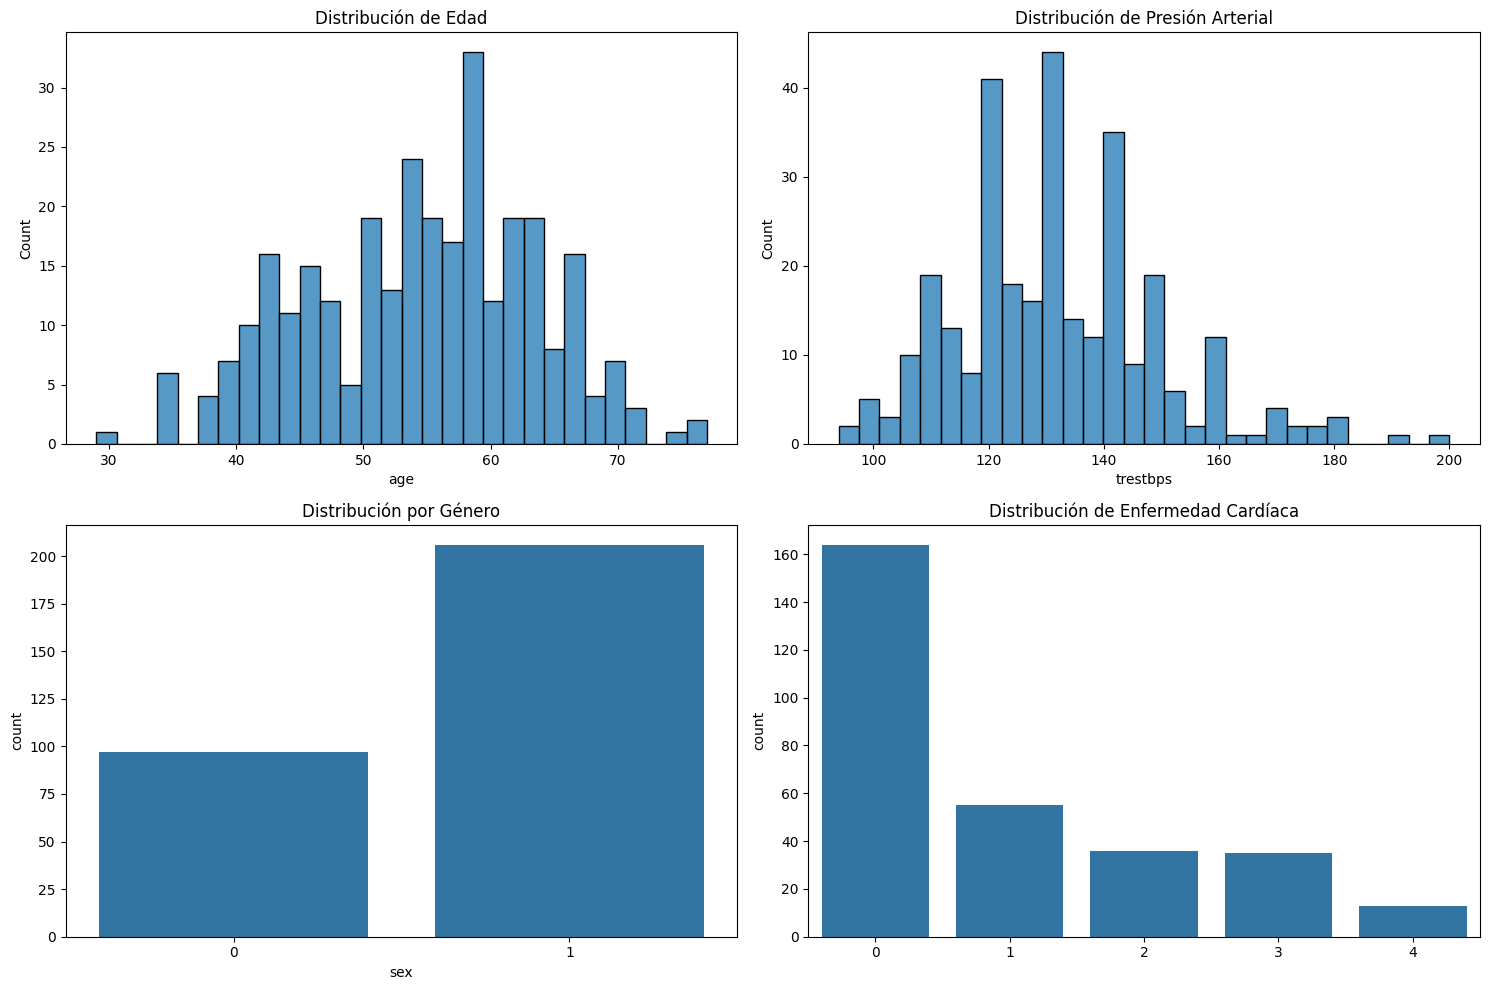

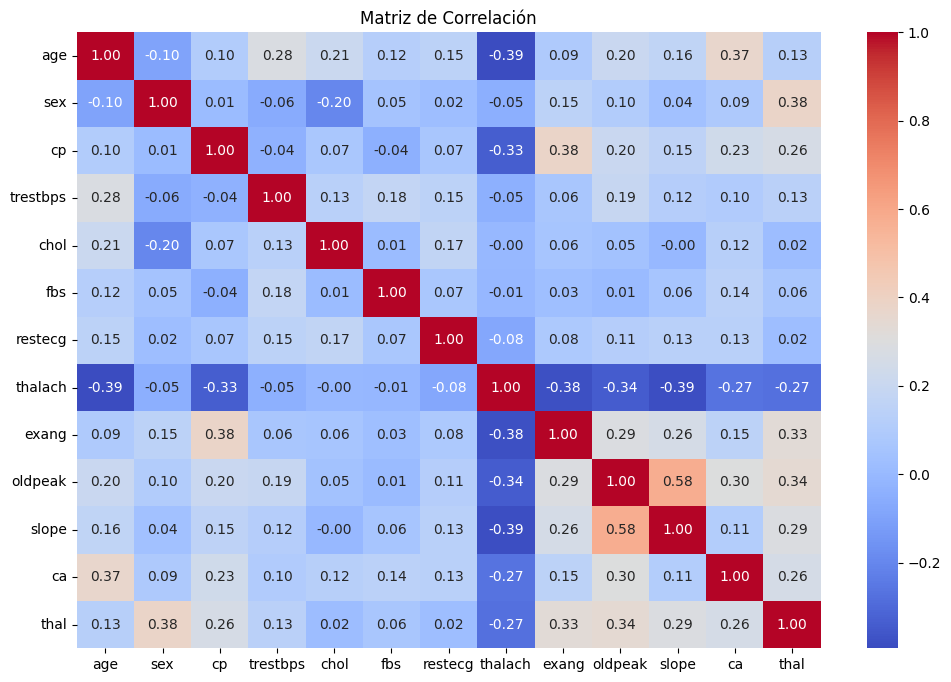


Distribución de clases:
Entrenamiento: [131  44  29  28  10]
Prueba: [33 11  7  7  3]
Epoch 1/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 9s 221ms/step - accuracy: 0.3624 - loss: 0.8893 - val_accuracy: 0.2857 - val_loss: 0.5636
Epoch 2/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3664 - loss: 0.5169 - val_accuracy: 0.3265 - val_loss: 0.3435
Epoch 3/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3921 - loss: 0.2716 - val_accuracy: 0.3673 - val_loss: 0.1587
Epoch 4/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3537 - loss: 0.1363 - val_accuracy: 0.3673 - val_loss: -0.0108
Epoch 5/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.3589 - loss: -0.1460 - val_accuracy: 0.3878 - val_loss: -0.1753
Epoch 6/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4174 - loss: -0.2271 - val_accuracy: 0.4082 - val_loss: -0.3493
Epoch 7/150
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3764 - loss: -0.5038 - val_accuracy: 0.4082 - val_loss: -0.5425
Epoch 8/150
7/7 ━━━━━━━

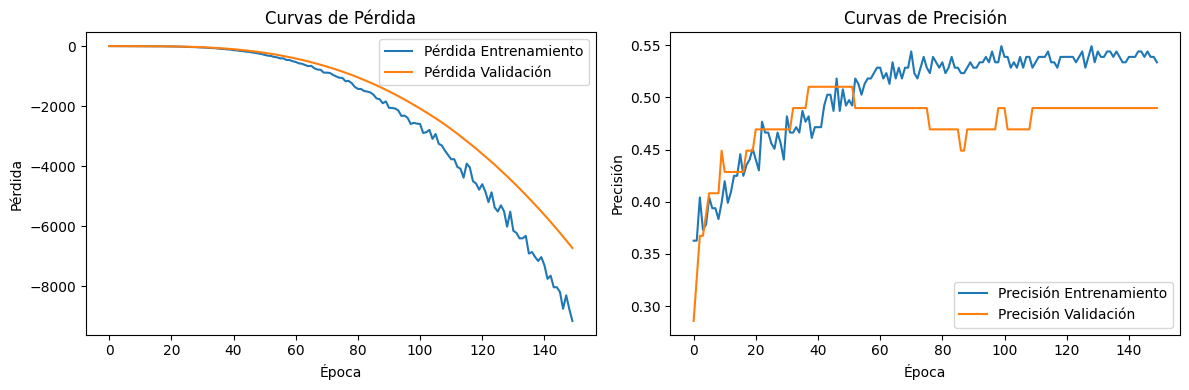

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

Rendimiento con diferentes umbrales:

Umbral: 0.3
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.26      0.82      0.39        11
           2       1.00      0.00      0.00         7
           3       1.00      0.00      0.00         7
           4       1.00      0.00      0.00         3

    accuracy                           0.54        61
   macro avg       0.84      0.31      0.24        61
weighted avg       0.82      0.54      0.51        61

Matriz de Confusión:
[[24  9  0  0  0]
 [ 2  9  0  0  0]
 [ 0  7  0  0  0]
 [ 0  7  0  0  0]
 [ 0  3  0  0  0]]

Umbral: 0.4
Informe de Clasificación:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81        33
           1       0.26      0.82      0.39        11
           2       1.00      0.00      0.00         7
           3       1.00     

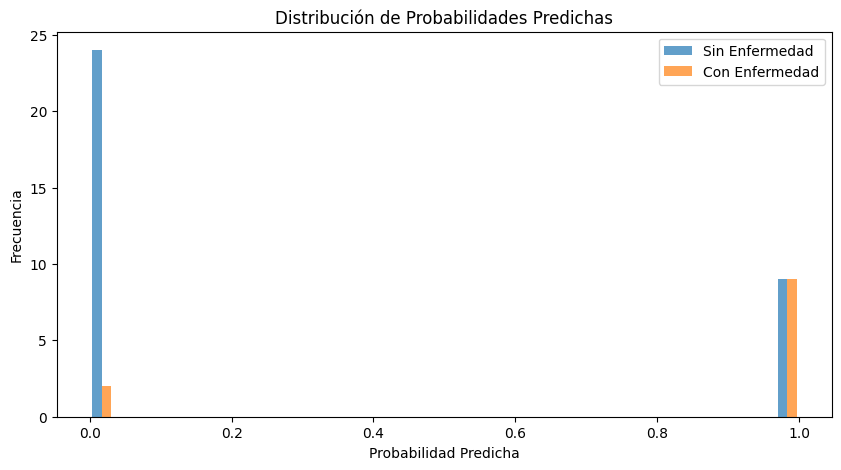

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 1. Carga y preprocesamiento de datos
def cargar_datos():
    # Cargar dataset de enfermedades cardíacas
    heart_disease = fetch_ucirepo(id=45)

    # Convertir a DataFrame
    X = pd.DataFrame(heart_disease.data.features, columns=heart_disease.data.feature_names)

    # Convertir targets a un array unidimensional
    y = np.array(heart_disease.data.targets).flatten()

    # Primeros 5 datos del dataframe
    print("Primeros 5 datos del dataframe:")
    print(X.head())

    # Ultimos 5 datos del dataframe
    print("\nUltimos 5 datos del dataframe:")
    print(X.tail())

    # Verificar valores nulos
    print("Valores nulos en el dataset:")
    print(X.isnull().sum())

    # Imputación de valores nulos
    X.fillna(X.median(), inplace=True)

    # Visualizar distribución de variables importantes
    plt.figure(figsize=(15, 10))

    # Edad
    plt.subplot(2, 2, 1)
    sns.histplot(data=X, x='age', bins=30)
    plt.title('Distribución de Edad')

    # Presión arterial
    plt.subplot(2, 2, 2)
    sns.histplot(data=X, x='trestbps', bins=30)
    plt.title('Distribución de Presión Arterial')

    # Distribución por género
    plt.subplot(2, 2, 3)
    sns.countplot(data=X, x='sex')
    plt.title('Distribución por Género')

    # Distribución de la variable objetivo
    plt.subplot(2, 2, 4)
    sns.countplot(x=y)
    plt.title('Distribución de Enfermedad Cardíaca')

    plt.tight_layout()
    plt.show()

    # Matriz de correlación
    plt.figure(figsize=(12, 8))
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Matriz de Correlación')
    plt.show()

    return X, y

# 2. Preprocesamiento y división de datos
def preparar_datos(X, y):
    # Normalización de variables numéricas
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # División de datos
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

    # Verificar balanceo de clases
    print("\nDistribución de clases:")
    print("Entrenamiento:", np.bincount(y_train))
    print("Prueba:", np.bincount(y_test))

    return X_train, X_test, y_train, y_test

# 3. Crear modelo MLP con Dropout
def crear_modelo_mlp_con_dropout(input_shape):
    modelo = Sequential([
        Input(shape=(input_shape,)),
        Dense(64, activation='relu'),
        Dropout(0.25),
        Dense(32, activation='relu'),
        Dropout(0.25),
        Dense(1, activation='sigmoid')
    ])

    # Compilar modelo
    modelo.compile(optimizer=Adam(learning_rate=0.001),
                   loss='binary_crossentropy',
                   metrics=['accuracy'])

    return modelo

# 4. Entrenar modelo con Early Stopping
def entrenar_modelo(modelo, X_train, y_train, X_val, y_val):
    # Configurar Early Stopping
    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    # Entrenar modelo
    historia = modelo.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=150,
        batch_size=32,
        callbacks=[early_stopping],
        verbose=1
    )

    return historia

# 5. Visualizar curvas de aprendizaje
def visualizar_curvas_aprendizaje(historia):
    plt.figure(figsize=(12, 4))

    # Gráfica de pérdida
    plt.subplot(1, 2, 1)
    plt.plot(historia.history['loss'], label='Pérdida Entrenamiento')
    plt.plot(historia.history['val_loss'], label='Pérdida Validación')
    plt.title('Curvas de Pérdida')
    plt.xlabel('Época')
    plt.ylabel('Pérdida')
    plt.legend()

    # Gráfica de precisión
    plt.subplot(1, 2, 2)
    plt.plot(historia.history['accuracy'], label='Precisión Entrenamiento')
    plt.plot(historia.history['val_accuracy'], label='Precisión Validación')
    plt.title('Curvas de Precisión')
    plt.xlabel('Época')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()
    plt.show()

# 6. Evaluar modelo
def evaluar_modelo(modelo, X_test, y_test):
    # Predicciones de probabilidad
    y_pred_proba = modelo.predict(X_test).flatten()

    # Diferentes umbrales de decisión
    umbrales = [0.3, 0.4, 0.5, 0.6, 0.7]

    print("\nRendimiento con diferentes umbrales:")
    for umbral in umbrales:
        # Predicciones binarias
        y_pred = (y_pred_proba >= umbral).astype(int)

        print(f"\nUmbral: {umbral}")
        print("Informe de Clasificación:")
        print(classification_report(y_test, y_pred, zero_division=1))

        # Matriz de confusión
        cm = confusion_matrix(y_test, y_pred)
        print("Matriz de Confusión:")
        print(cm)

    # Visualizar distribución de probabilidades
    plt.figure(figsize=(10, 5))
    plt.hist([y_pred_proba[y_test == 0], y_pred_proba[y_test == 1]],
             label=['Sin Enfermedad', 'Con Enfermedad'],
             bins=30, alpha=0.7)
    plt.title('Distribución de Probabilidades Predichas')
    plt.xlabel('Probabilidad Predicha')
    plt.ylabel('Frecuencia')
    plt.legend()
    plt.show()

# Función principal
def main():
    # Cargar datos
    X, y = cargar_datos()

    # Preparar datos
    X_train, X_test, y_train, y_test = preparar_datos(X, y)

    # División adicional para validación
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

    # Crear y entrenar modelo con dropout
    modelo_dropout = crear_modelo_mlp_con_dropout(X_train.shape[1])
    historia = entrenar_modelo(modelo_dropout, X_train, y_train, X_val, y_val)

    # Visualizar curvas de aprendizaje
    visualizar_curvas_aprendizaje(historia)

    # Evaluar modelo
    evaluar_modelo(modelo_dropout, X_test, y_test)

# Establecer semilla para reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# Ejecutar script principal
if __name__ == "__main__":
    main()

# **Comparación de Modelos: Dropout y Early Stopping vs. MLP Básico**
**Impacto de Dropout y Early Stopping en el Rendimiento**

**Modelo MLP con Dropout y Early Stopping:**

* **Dropout:** Es una técnica de regularización que ayuda a prevenir el sobreajuste apagando aleatoriamente neuronas durante el entrenamiento. Esto fuerza a la red a aprender representaciones más robustas y evita que dependa demasiado de cualquier neurona en particular.

* **Early Stopping:** Detiene el entrenamiento cuando el modelo deja de mejorar en el conjunto de validación, ayudando a evitar el sobreajuste y reducir el tiempo de entrenamiento.

**Modelo MLP Básico:**

* **Sin Dropout ni Early Stopping:** Un MLP básico sin estas técnicas podría sobreajustarse a los datos de entrenamiento, especialmente si el modelo es complejo y los datos de entrenamiento son limitados.

* **Mayor Riesgo de Sobreajuste:** Sin estas técnicas, es más probable que el modelo ajuste demasiado bien el conjunto de entrenamiento y tenga un rendimiento inferior en datos de prueba nuevos.

**Comparación de Métricas de Rendimiento**
Las métricas proporcionadas son para el modelo con dropout y early stopping:

**Umbrales:**

1.  **Umbral 0.3:**

  * **Accuracy:** 0.54

  * **Precision (Clase 0):** 0.92

  * **Recall (Clase 0):** 0.73

  * **F1-Score (Clase 0):** 0.81

  * **Matriz de Confusión:** Indica que la clase mayoritaria (0) tiene una alta precisión, pero otras clases muestran bajo recall y f1-score.

2.  **Umbral 0.4 a 0.7:** Las métricas son consistentes a través de diferentes umbrales, mostrando que cambiar el umbral no afecta significativamente el rendimiento del modelo.

# **Discusión del Rendimiento**
**Ventajas del Uso de Dropout y Early Stopping:**

1.  **Regularización:** Dropout ayuda a prevenir el sobreajuste, lo que es crucial cuando se trabaja con redes neuronales profundas.

2.  **Reducción del Sobreajuste:** Early stopping previene el entrenamiento excesivo, manteniendo el modelo generalizado.

3.  **Consistencia:** Las métricas consistentes a través de diferentes umbrales muestran que el modelo es robusto y no se ve afectado fácilmente por variaciones menores en los datos.

**Desempeño con Diferentes Umbrales:**

* Precisión de Clase 0: Se mantiene alta a través de todos los umbrales.

* Rendimiento de Otras Clases: Las clases minoritarias tienen un recall bajo, lo que indica que el modelo tiene dificultades para predecir correctamente estas clases.

# **Estrategias para Mejorar el Rendimiento**
1.  **Ajuste de Hiperparámetros:** Experimentar con diferentes configuraciones de hiperparámetros, como el tamaño de las capas ocultas, tasa de aprendizaje y tasa de dropout.

2.  **Aumento de Datos:** Recolectar más datos o utilizar técnicas de aumento de datos para mejorar la capacidad del modelo para generalizar.

3.  **Balanceo de Clases:** Implementar técnicas de balanceo de clases como SMOTE para aumentar la representación de clases minoritarias.

4.  **Reducción Adicional de Dimensionalidad:** Probar técnicas adicionales de reducción de dimensionalidad o combinación de múltiples técnicas para mejorar la representatividad de las características.

# **Informe Final**
**Análisis de Reducción de Dimensionalidad:**

* **PCA:** Ayuda a reducir el número de características mientras retiene la mayoría de la información relevante. La visualización muestra cómo los datos se distribuyen en un espacio de menor dimensión, facilitando la interpretación y análisis.

**Análisis Comparativo de Modelos:**

* **Gráficos Comparativos:** Mostrar gráficos que comparen las métricas de rendimiento de diferentes modelos ayuda a visualizar las diferencias y seleccionar el modelo más adecuado.

**Conclusiones y Recomendaciones:**

* **Modelo Recomendado:** Random Forest o SVM, debido a su alta precisión y robustez.

* **Mejoras Futuras:** Ajuste de hiperparámetros, técnicas de regularización y balanceo de clases.